## How to run a Cosmological EoR Simulation

In this tutorial we will show how to run a simple cosmological EoR simulation with the pyC$^2$Ray code. This correspond to the main scirpt to run the code and it require some basic functions.

In [2]:
import pyc2ray as pc2r
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

import astropy.units as u
import astropy.constants as cst

### Global parameters
As we saw in the the tutorial on the parameter of pyC$^2$Ray, most of the variables are defined in a parameter file, `parameters.yml`. However, we still need to define some global parameters for the cosmological simulation.

Moreover, we define the number of refined time-steps that we want to do in between redshift steps, `num_steps_between_slices`. This splits further the redshift-step and allows for a faster convergence of the ODE solution.

Lastly, we need to define the `redshifts` to simulate. We suggest, you pick the value corresponding to the snapshots of the inputs (i.e.: density field and source files).

In [3]:
# parameter file
paramfile = 'parameters.yml'

# refined time-steps
num_steps_between_slices = 20

# Define redshift list
redshifts = np.linspace(12, 10, 20)

Here we define a python class for our simulation as subclass of the basic C2Ray class, which is a standard version.

In [4]:
class C2Ray_tutorial(pc2r.c2ray_base.C2Ray):
    def __init__(self, paramfile):
        """Basis class for a C2Ray Simulation

        Parameters
        ----------
        paramfile : str
            Name of a YAML file containing parameters for the C2Ray simulation
        """
        super().__init__(paramfile)
        self.printlog('Running: "C2Ray tutorial for %d Mpc/h volume"' %self.boxsize)

    # ===========================================
    # HEREAFTER: USER DEFINED METHODS
    # ===========================================
    
    def read_sources(self, z, nsrc, dt):
        np.random.seed(918)
        
        """        
        # Read random sources (e.g.: *.npy, *.h5, etc.)
        pos_halo = np.random.uniform(low=0, high=sim.boxsize, size=(nsrc, 3))
        mhalo = np.random.uniform(1e8, 1e14, nsrc)*u.Msun

        # Define stellar-to-halo relation
        fstar = 0.1
        
        # Define escaping fraction
        fesc = 0.1
        
        # sum togheter the star mass for sources within the same voxel
        pos_star, mstar = pc2r.other_utils.bin_sources(srcpos_mpc=pos_halo, mstar_msun=mhalo*fstar*fesc, boxsize=sim.boxsize, meshsize=sim.N)
        """
        
        pos_star = np.array([sim.N//2, sim.N//2, sim.N//2])
        pos_star = pos_star[None,...]
        mstar = np.array([1e14])

        # this reference flux is necessary only for a numercial reason
        S_star_ref = 1e48
        
        # The normalize flux in CGS units
        dotN = (mstar*u.Msun/(cst.m_p*dt)).cgs.value
        
        # calculate some quantity thtat you want to print (e.g. total number of ionizing photons)
        self.tot_phots = np.sum(dotN * dt)

        return pos_star, dotN/S_star_ref
    
    def read_density(self, z):
        # Read the density field
        self.ndens = 1e-6 * np.ones((sim.N, sim.N, sim.N))
        return self.ndens

In [5]:
# init the C2Ray class for the tutorial
sim = C2Ray_tutorial(paramfile)

GPU Device 0: "NVIDIA RTX A1000 6GB Laptop GPU" with compute capability 8.6
Successfully allocated 536.871 Mb of device memory for grid of size N = 256, with source batch size 1
                 _________   ____            
    ____  __  __/ ____/__ \ / __ \____ ___  __
   / __ \/ / / / /    __/ // /_/ / __ `/ / / /
  / /_/ / /_/ / /___ / __// _, _/ /_/ / /_/ / 
 / .___/\__, /\____//____/_/ |_|\__,_/\__, /  
/_/    /____/                        /____/   

Welcome! Mesh size is N = 256.
Simulation Box size (comoving Mpc): 1.280e+02
Cosmology is on, scaling comoving quantities to the initial redshift, which is z0 = 12.000...
Cosmological parameters used:
h   = 0.6766, Tcmb0 = 2.725e+00
Om0 = 0.3097, Ob0   = 0.0490
Using power-law opacity with 10,000 table points between tau=10^(-20) and tau=10^(4)
Using Black-Body sources with effective temperature T = 5.0e+04 K and Radius  1.437e-11 rsun
Spectrum Frequency Range: 3.288e+15 to 1.316e+17 Hz
This is Energy:           1.360e+01 to 5.442e+02

### Redshift Loop

We can now define the main cycle that loop over the different redshift. Within each redshift-step, a

- `set_timestep`: get the time length of the current redshift step (inherited from c2ray_base.py).
- `read_density`: read the IGM density field (custom function)
- `read_sources`: read the halos position and mass (custom function)
- `cosmo_evolve`:  (inherited from c2ray_base.py)
- `evolve3D`:  (inherited from c2ray_base.py)
- `cosmo_evolve_to_now`:  (inherited from c2ray_base.py)
- `write_output`: inherited from c2ray_base.py to save outputs and summary

Copied source data to device.
Calling evolve3D...
dr [Mpc]: 3.850e-02
dt [years]: 2.261e+05
Running on 1 source(s), total normalized ionizing flux: 1.67e+10
Mean density (cgs): 9.969e-07, Mean ionized fraction: 1.208e-03
Convergence Criterion (Number of points):  0

Doing Raytracing... took  0.1 s.
Doing Chemistry... took  1.3 s.
Number of non-converged points: 210 of 16777216 ( 0.001 % ), Relative change in ionfrac:  1.65e+03
Doing Raytracing... took  0.1 s.
Doing Chemistry... took  1.3 s.
Number of non-converged points: 126 of 16777216 ( 0.001 % ), Relative change in ionfrac:  2.80e-05
Multiple source convergence reached after 2 ray-tracing iterations.


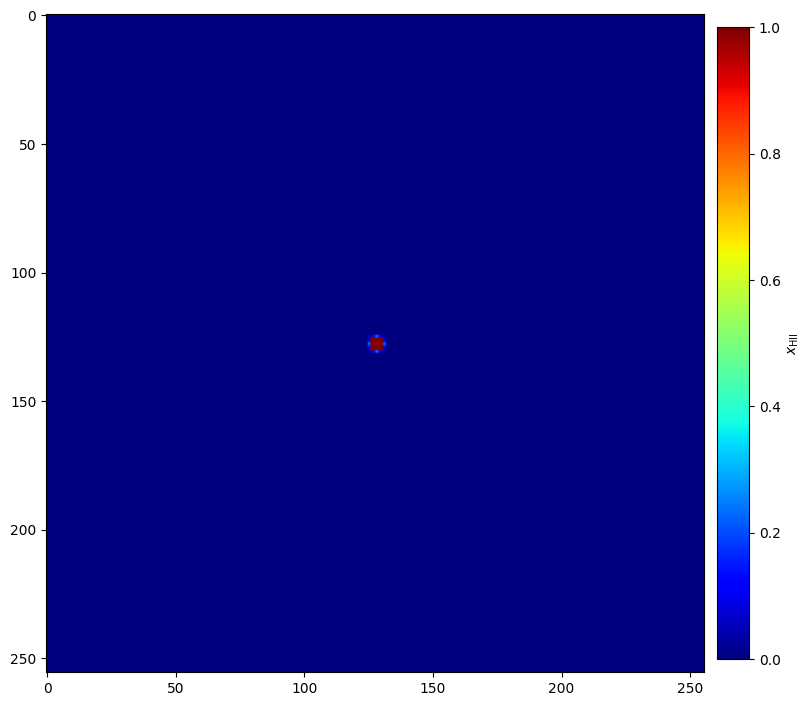

Copied source data to device.
Calling evolve3D...
dr [Mpc]: 3.851e-02
dt [years]: 2.261e+05
Running on 1 source(s), total normalized ionizing flux: 1.67e+10
Mean density (cgs): 9.957e-07, Mean ionized fraction: 1.208e-03
Convergence Criterion (Number of points):  0

Doing Raytracing... took  0.1 s.
Doing Chemistry... took  1.3 s.
Number of non-converged points: 186 of 16777216 ( 0.001 % ), Relative change in ionfrac:  1.65e+03
Doing Raytracing... took  0.1 s.
Doing Chemistry... took  1.3 s.
Number of non-converged points: 54 of 16777216 ( 0.000 % ), Relative change in ionfrac:  1.63e-05
Multiple source convergence reached after 2 ray-tracing iterations.


<Figure size 640x480 with 0 Axes>

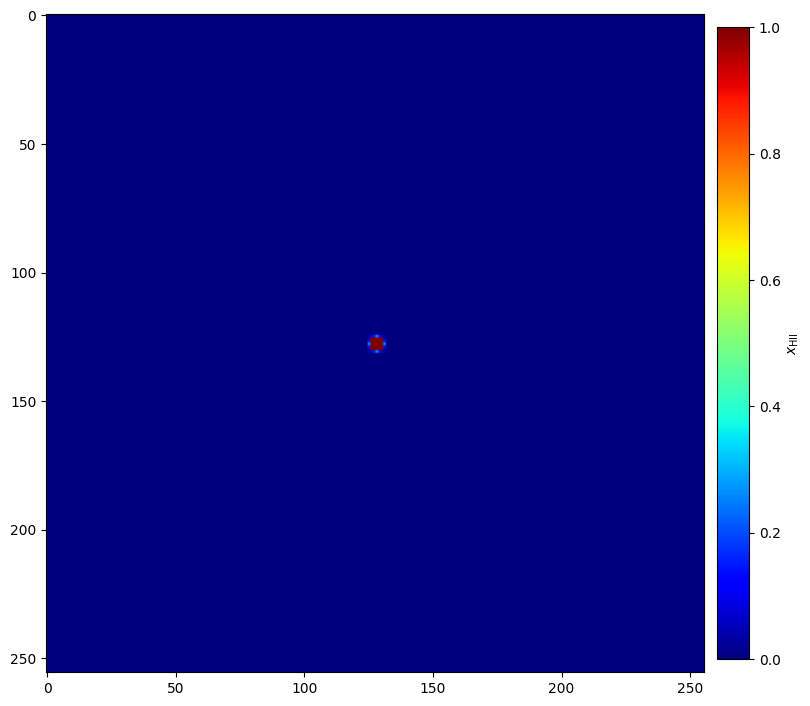

Copied source data to device.
Calling evolve3D...
dr [Mpc]: 3.853e-02
dt [years]: 2.261e+05
Running on 1 source(s), total normalized ionizing flux: 1.67e+10
Mean density (cgs): 9.945e-07, Mean ionized fraction: 1.208e-03
Convergence Criterion (Number of points):  0

Doing Raytracing... took  0.1 s.
Doing Chemistry... took  1.3 s.
Number of non-converged points: 126 of 16777216 ( 0.001 % ), Relative change in ionfrac:  1.65e+03
Doing Raytracing... took  0.1 s.
Doing Chemistry... took  1.3 s.
Number of non-converged points: 30 of 16777216 ( 0.000 % ), Relative change in ionfrac:  9.50e-06
Multiple source convergence reached after 2 ray-tracing iterations.


<Figure size 640x480 with 0 Axes>

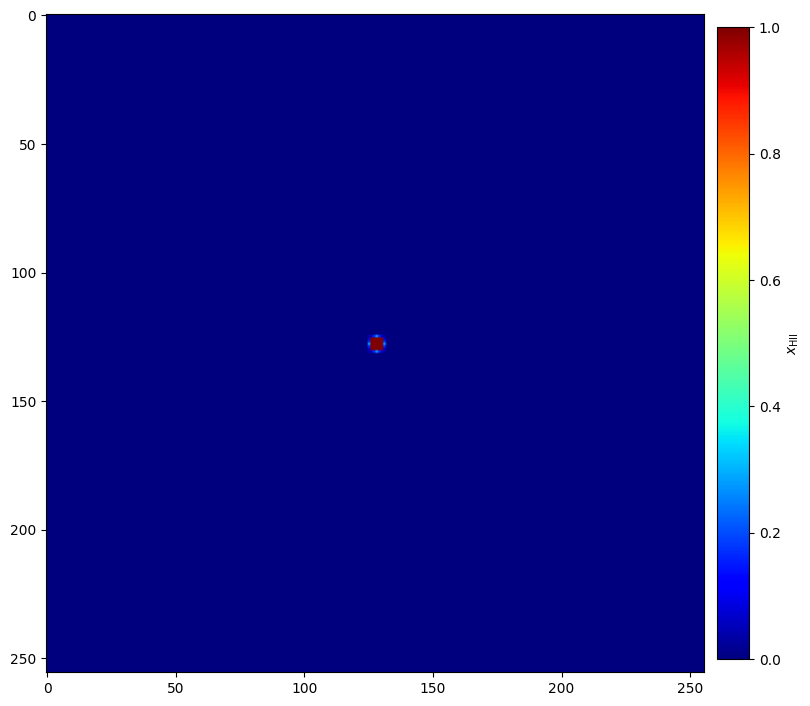

Copied source data to device.
Calling evolve3D...
dr [Mpc]: 3.854e-02
dt [years]: 2.261e+05
Running on 1 source(s), total normalized ionizing flux: 1.67e+10
Mean density (cgs): 9.933e-07, Mean ionized fraction: 1.208e-03
Convergence Criterion (Number of points):  0

Doing Raytracing... took  0.1 s.
Doing Chemistry... took  1.3 s.
Number of non-converged points: 78 of 16777216 ( 0.000 % ), Relative change in ionfrac:  1.65e+03
Doing Raytracing... took  0.1 s.
Doing Chemistry... took  1.3 s.
Number of non-converged points: 6 of 16777216 ( 0.000 % ), Relative change in ionfrac:  5.73e-06
Multiple source convergence reached after 2 ray-tracing iterations.


<Figure size 640x480 with 0 Axes>

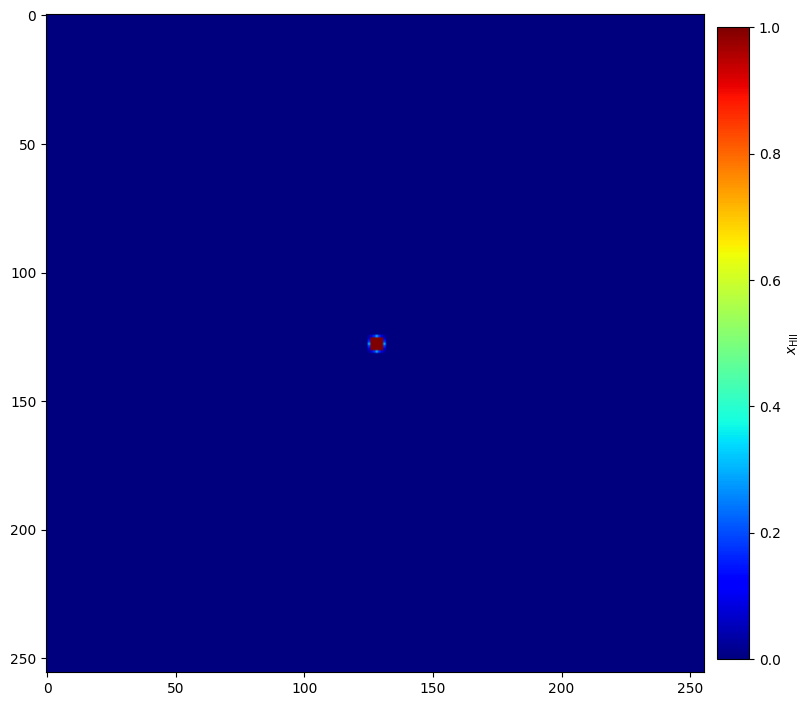

Copied source data to device.
Calling evolve3D...
dr [Mpc]: 3.856e-02
dt [years]: 2.261e+05
Running on 1 source(s), total normalized ionizing flux: 1.67e+10
Mean density (cgs): 9.921e-07, Mean ionized fraction: 1.208e-03
Convergence Criterion (Number of points):  0

Doing Raytracing... took  0.1 s.
Doing Chemistry... took  1.3 s.
Number of non-converged points: 54 of 16777216 ( 0.000 % ), Relative change in ionfrac:  1.65e+03
Doing Raytracing... took  0.1 s.
Doing Chemistry... 

In [ ]:
for k in range(redshifts.size-1):
    # redshift at the begin and end of the step
    zi = redshifts[k]
    zf = redshifts[k+1]
    
    # Write a nice header in pyc2ray log file
    sim.printlog("\n=========== Doing redshift %.3f to %.3f ===========\n" %(zi, zf), sim.logfile)

    # Compute timestep of current redshift slice
    dt = sim.set_timestep(zi, zf, num_steps_between_slices)
    
    # Read density files
    sim.read_density(z=zi)

    # Read source files
    srcpos, normflux = sim.read_sources(nsrc=10, z=zi, dt=dt)
    
    # Set redshift to current slice redshift
    sim.zred = zi
    
    # Loop over timesteps
    for t in range(num_steps_between_slices):
        
        # Evolve Cosmology: increment redshift and scale physical quantities (density, proper cell size, etc.)
        sim.cosmo_evolve(dt)

        # Evolve the simulation: compute column density -> get photoionization rates -> do chemistry (repeat until convergence)
        sim.evolve3D(dt, normflux, srcpos)

        # You can eventually plot on the fly to have a look at the simulation
        fig, axs = plt.subplots(figsize=(8, 8), nrows=1, ncols=1, constrained_layout=True)

        # plot hydrogen ionized fraction
        im = axs.imshow(sim.xh[...,sim.N//2], vmin=0, vmax=1, cmap='jet')
        plt.colorbar(im, ax=axs, label=r'$x_\mathrm{HII}$', pad=0.02, fraction=0.048)
        plt.show(), plt.clf()

    # Evolve cosmology over final half time step to reach the correct time for next slice
    sim.cosmo_evolve_to_now()

    # Write outputs (HII field and photoioniation rate) of the redshift step after updating the neutral fraction
    sim.write_output(z=zi, ext='.npy')
    
print('Simulation ended.')